In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
from matplotlib.pyplot import figure
import seaborn as sns

In [105]:
data = pd.read_excel("CANDYCANE.xlsx")

In [106]:
data.shape

(422378, 9)

In [107]:
data.isnull().sum()

Type of Facility                         0
Name of Facility                         0
Timestamp                                0
Wellhead Casing "A" - Pressure           0
Wellhead Casing "B" - Pressure      422314
Flowline Pressure                        0
Flowline Temperature                     0
Volume - Calendar Day Production         0
Wellhead Tubing - Pressure               0
dtype: int64

In [108]:
data.iloc[:,0].unique()

array(['Synthetic Data '], dtype=object)

In [109]:
data.iloc[:,1].unique()

array(['CANDY CANE WELL 101'], dtype=object)

In [110]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data.iloc[i,j] == 'No Available Data':
            data.iloc[i,j] = None

In [111]:
data = data[64:].drop(['Type of Facility','Name of Facility','Wellhead Casing "B" - Pressure'], axis = 1)

In [112]:
data.iloc[0,3] = 0

In [113]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [114]:
data.iloc[:,1] = pd.to_numeric(data.iloc[:,1], errors='coerce').astype(float)
data.iloc[:,2] = pd.to_numeric(data.iloc[:,2], errors='coerce').astype(float)
data.iloc[:,3] = pd.to_numeric(data.iloc[:,3], errors='coerce').astype(float)
data.iloc[:,4] = pd.to_numeric(data.iloc[:,4], errors='coerce').astype(float)
data.iloc[:,5] = pd.to_numeric(data.iloc[:,5], errors='coerce').astype(float)

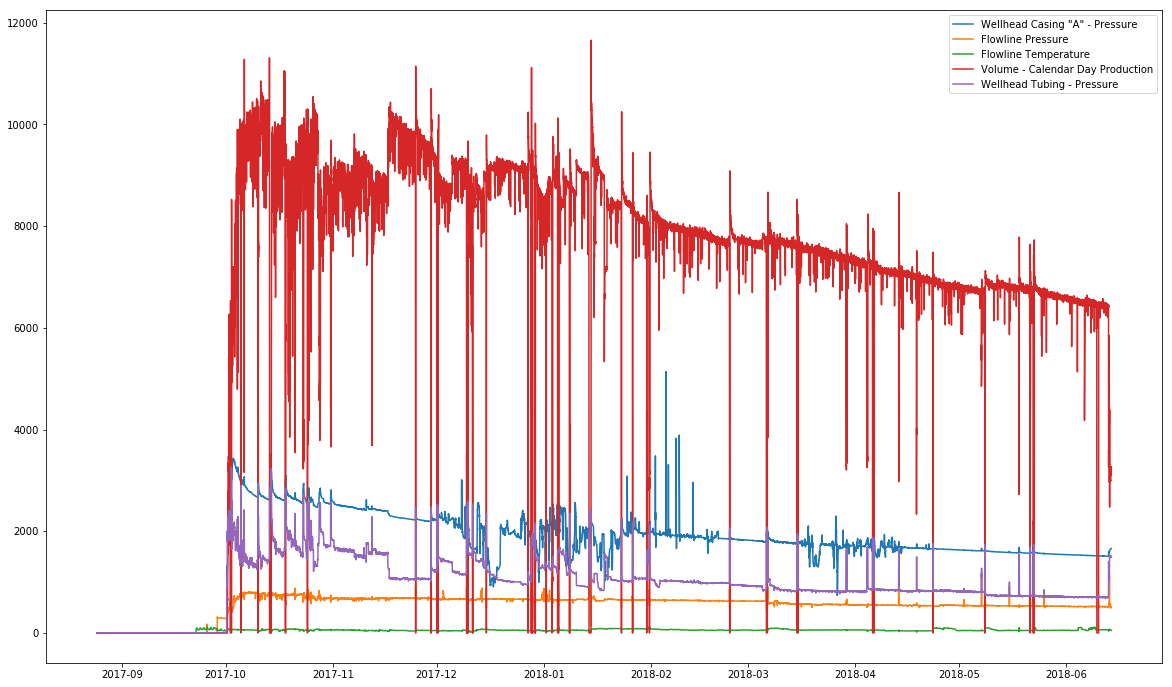

In [122]:
fig, ax = plt.subplots(figsize=(20,12))
plt.plot(data.iloc[:,0],data.iloc[:,1],label = 'Wellhead Casing "A" - Pressure')
plt.plot(data.iloc[:,0],data.iloc[:,2],label = 'Flowline Pressure')
plt.plot(data.iloc[:,0],data.iloc[:,3],label = 'Flowline Temperature')
plt.plot(data.iloc[:,0],data.iloc[:,4],label = 'Volume - Calendar Day Production')
plt.plot(data.iloc[:,0],data.iloc[:,5],label = 'Wellhead Tubing - Pressure')
plt.legend()

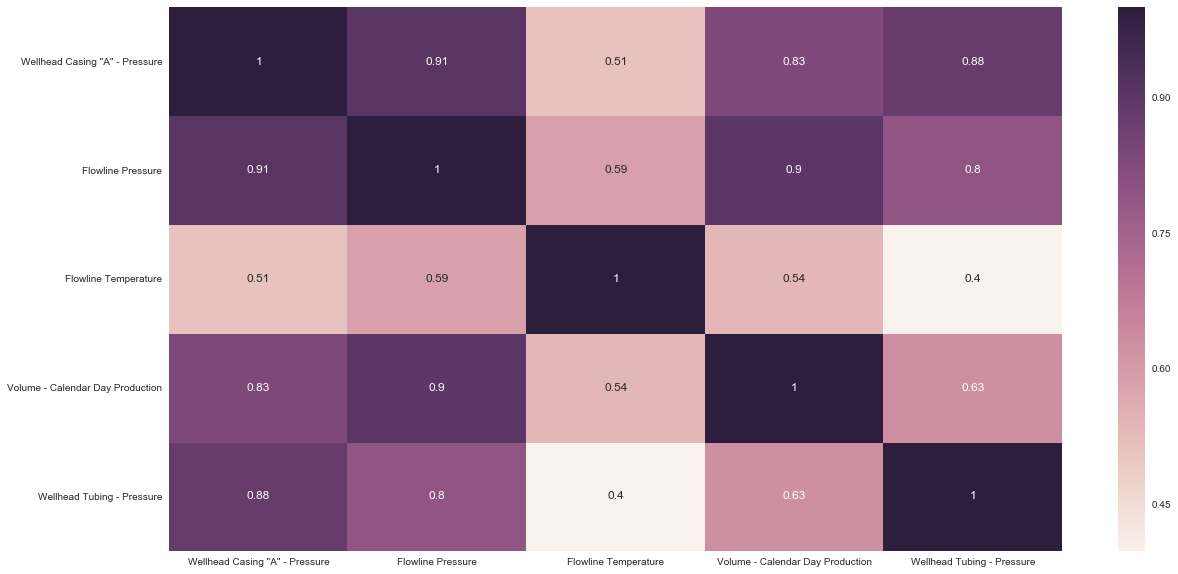

In [127]:
features_to_use = ['Wellhead Casing "A" - Pressure','Flowline Pressure','Flowline Temperature',
                   'Volume - Calendar Day Production','Wellhead Tubing - Pressure']
features = data[features_to_use]
corr = round(features.corr(),5)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot = True)

In [166]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [155]:
y = data['Volume - Calendar Day Production']
x = data.drop(['Timestamp','Volume - Calendar Day Production'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train = x_train.reshape(x_train.shape[0], 1 , x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1 , x_test.shape[1])

In [167]:
model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=70, validation_data=(x_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 337851 samples, validate on 84463 samples
Epoch 1/20
337851/337851 [==============================] - 14s 42us/step - loss: nan - accuracy: 0.0014 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/20
337851/337851 [==============================] - 15s 45us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
337851/337851 [==============================] - 12s 37us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
337851/337851 [==============================] - 12s 36us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
337851/337851 [==============================] - 12s 37us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
337851/337851 [==============================] - 15s 43us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
337851/337851 [===============

In [169]:
from sklearn.metrics import confusion_matrix
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [174]:
test_predict

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Train Mean Absolute Error:', mean_absolute_error(y_train, train_predict))
print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, train_predict)))
print('Test Mean Absolute Error:', mean_absolute_error(y_test, test_predict))
print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_predict)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').